# Results Figure 1

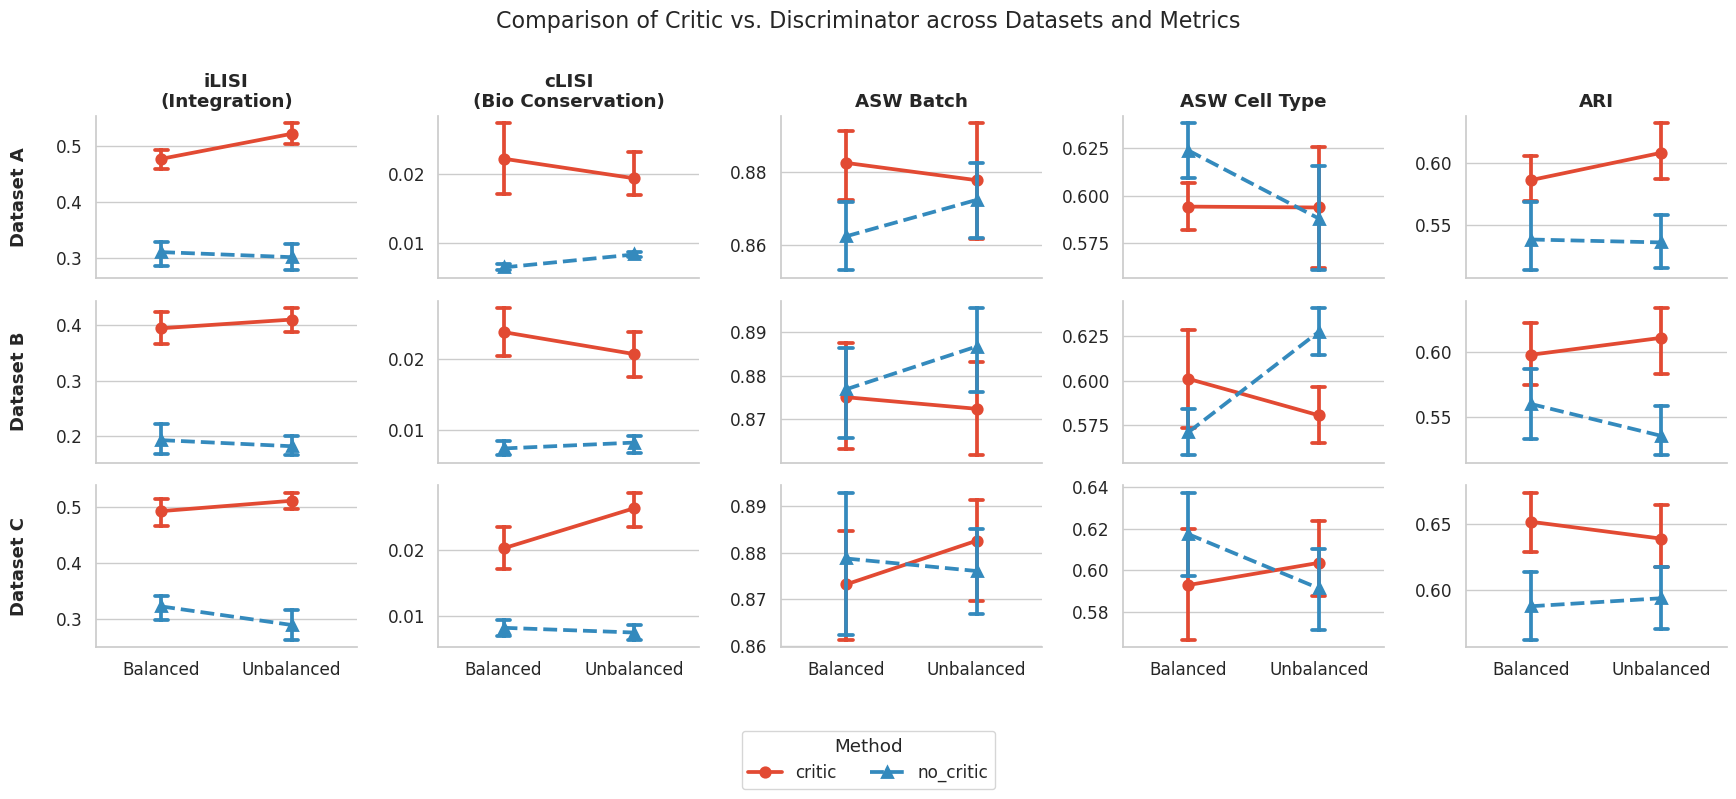

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Data Preparation (Same as before) ---
# (Generating dummy data for demonstration)
data = []
datasets = ['Dataset A', 'Dataset B', 'Dataset C']
conditions = ['Balanced', 'Unbalanced']
methods = ['critic', 'no_critic']
metrics = ['ilisi', 'clisi', 'asw_batch', 'asw_celltype', 'ari']

np.random.seed(42)

for ds in datasets:
    for cond in conditions:
        for method in methods:
            for fold in range(1, 6):
                row = {
                    'dataset': ds,
                    'condition': cond,
                    'method': method,
                    'fold': fold,
                    'ilisi': np.random.uniform(0.45, 0.55) if method=='critic' else np.random.uniform(0.25, 0.35),
                    'clisi': np.random.uniform(0.015, 0.03) if method=='critic' else np.random.uniform(0.005, 0.01),
                    'asw_batch': np.random.uniform(0.85, 0.9),
                    'asw_celltype': np.random.uniform(0.55, 0.65),
                    'ari': np.random.uniform(0.55, 0.65) if method=='critic' else np.random.uniform(0.50, 0.60),
                }
                if ds == 'Dataset B': row['ilisi'] -= 0.1
                if ds == 'Dataset C': row['ari'] += 0.05
                data.append(row)

combined_df = pd.DataFrame(data)

long_df = combined_df.melt(
    id_vars=['dataset', 'condition', 'method', 'fold'],
    value_vars=['ilisi', 'clisi', 'asw_batch', 'asw_celltype', 'ari'],
    var_name='metric_type',
    value_name='score'
)

metric_renames = {
    'ilisi': 'iLISI\n(Integration)',
    'clisi': 'cLISI\n(Bio Conservation)',
    'asw_batch': 'ASW Batch',
    'asw_celltype': 'ASW Cell Type',
    'ari': 'ARI'
}
long_df['metric_type'] = long_df['metric_type'].map(metric_renames)


# --- 2. Create the Visualization ---

sns.set_theme(style="whitegrid", font_scale=1.1)

g = sns.catplot(
    data=long_df,
    x="condition",
    y="score",
    hue="method",
    col="metric_type",
    row="dataset",
    kind="point",
    errorbar=("ci", 95),
    palette={"critic": "#E24A33", "no_critic": "#348ABD"},
    height=2.5,
    # CHANGED: Increased aspect ratio from 0.9 to 1.3 to widen the plots
    aspect=1.3,
    sharey=False,
    sharex=True,
    markers=["o", "^"],
    linestyles=["-", "--"],
    capsize=0.1,
    margin_titles=False
)

# --- 3. Customizing Labels and Titles ---

# A. Clear default axis labels
g.set_axis_labels("", "")

# B. Nuke existing titles so we can rebuild them manually without interference
g.set_titles(row_template="", col_template="")

# C. Manual Axis Manipulation Loop
for i, row_axes in enumerate(g.axes):
    for j, ax in enumerate(row_axes):
        
        # --- Handle Row Labels (Dataset Names) on far left Y-axis ---
        if j == 0:
             ax.set_ylabel(g.row_names[i], fontweight='bold', fontsize=13, labelpad=20)

        # --- Handle Column Titles (Metric Names) ---
        if i == 0:
            # TOP ROW: Set title manually using the clean list from seaborn
            clean_title = g.col_names[j]
            ax.set_title(clean_title, fontweight='bold')
        else:
            # NOT TOP ROW: Ensure title is clear.
            ax.set_title("")


# --- 4. Final Polish ---

g.fig.suptitle("Comparison of Critic vs. Discriminator across Datasets and Metrics", y=1.0, fontsize=16)

# Move legend down
sns.move_legend(g, "upper center", bbox_to_anchor=(0.5, 0.05), ncol=2, title="Method", frameon=True)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

plt.show()

# Results Figure 2